In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
#create data drame to read data set
df = pd.read_csv('C:/Users/abarn/Downloads/startup/startups_data.csv')

In [6]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,78051.14365,55537.75251,12770.82,New York,54575.486170
1,11163.47269,241608.96630,55012.62,New York,-6257.430253
2,153848.90340,169007.95040,46708.68,Florida,86707.726460
3,46913.23785,55770.16760,222415.30,California,36073.618930
4,16844.34943,116066.11220,164528.39,California,24696.317850


In [5]:
df.describe

<bound method NDFrame.describe of          R&D Spend  Administration  Marketing Spend       State        Profit
0     78051.143650     55537.75251         12770.82    New York  54575.486170
1     11163.472690    241608.96630         55012.62    New York  -6257.430253
2    153848.903400    169007.95040         46708.68     Florida  86707.726460
3     46913.237850     55770.16760        222415.30  California  36073.618930
4     16844.349430    116066.11220        164528.39  California  24696.317850
..             ...             ...              ...         ...           ...
395   52507.895240    219465.63110        154298.90  California  49793.819410
396    5186.034129     51717.16237        224220.50    New York  12800.153000
397   34417.442390    114841.49260         74629.18     Florida  22339.883480
398   84856.919170    121000.58900         49356.31  California  33086.305090
399   56026.206790    120935.15950         12530.13  California  11315.937930

[400 rows x 5 columns]>

In [7]:
# find missing values
features_na = [features for features in df.columns if df[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')
else:
    print("No missing value found")

No missing value found


take-away
No missing value found


# 3. Find Features with one value

In [9]:

for column in df.columns:
    print(column,df[column].nunique())

R&D Spend 400
Administration 396
Marketing Spend 358
State 3
Profit 400


# 4. Explore the Categorical Features

In [10]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

['State']

In [11]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is State and number of categories are 3


Take-away



only one feature that is State is categorical and it has 3 unique values

# 5. Find Categorical Feature Distribution

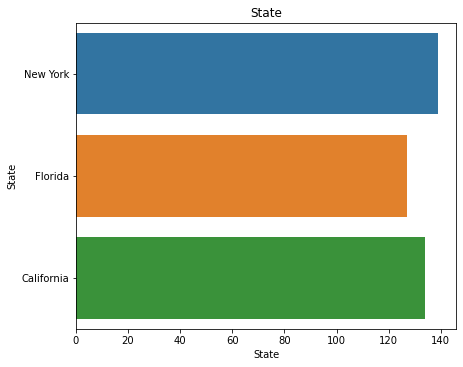

In [12]:
#check count based on categorical features
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,2,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

Take-away



State with florida has less number of records in given dataset

# 6. Relationship between Categorical Features and Label

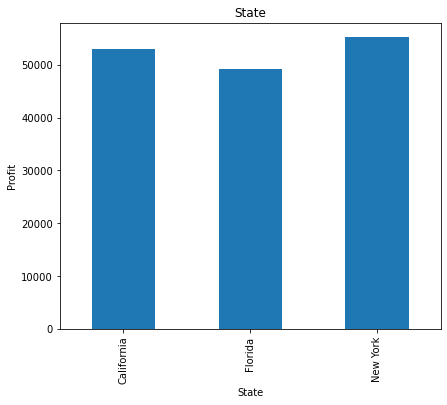

In [13]:
#Find out the relationship between categorical variable and dependent varaible
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for feature in categorical_features:
    ax = plt.subplot(12,2,plotnumber)
    data=df.copy()
    data.groupby(feature)['Profit'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Profit')
    plt.title(feature)
    plotnumber+=1
plt.show()

Take-away



It seems startup in state of California has less profits than others two states

# 8. Explore the Numerical Features

In [14]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['Profit']))]
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  3


,R&D Spend,Administration,Marketing Spend
0,78051.14365,55537.75251,12770.82
1,11163.47269,241608.96630,55012.62
2,153848.90340,169007.95040,46708.68
3,46913.23785,55770.16760,222415.30
4,16844.34943,116066.11220,164528.39


Take-away


there are three numerical features that are R&D Spend, Administration and Marketing Spend

# 9. Find Discrete Numerical Features

In [15]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


no discrete varaible found

# 10. Find Continous Numerical Features

In [16]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['Profit']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 3


In [17]:
continuous_features

['R&D Spend', 'Administration', 'Marketing Spend']

there are three continous numerical features..'R&D Spend', 'Administration', 'Marketing Spend'

# 11. Distribution of Continous Numerical Features

C:\Users\abarn\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\abarn\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\abarn\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

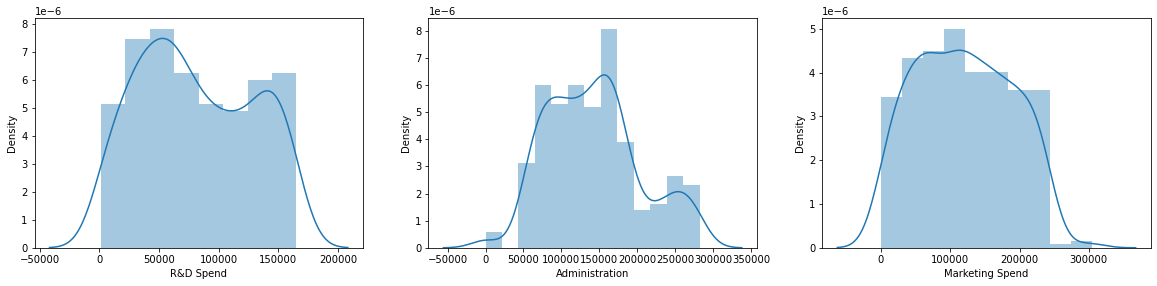

In [18]:
#plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

it seems all continuous features are normally distributed

# 12. Relation between Continous numerical Features and Labels

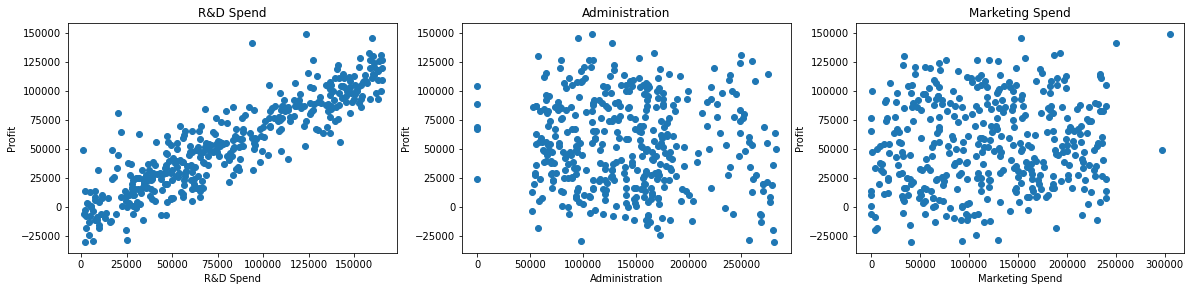

In [19]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
    data=df.copy()
    ax = plt.subplot(12,3,plotnumber)
    plt.scatter(data[feature],data['Profit'])
    plt.xlabel(feature)
    plt.ylabel('Profit')
    plt.title(feature)
    plotnumber+=1
plt.show()

it seems R&D Spend, Marketing Spend feature linearly progressing with Profit


# 13. Find Outliers in numerical features

C:\Users\abarn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\abarn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\abarn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


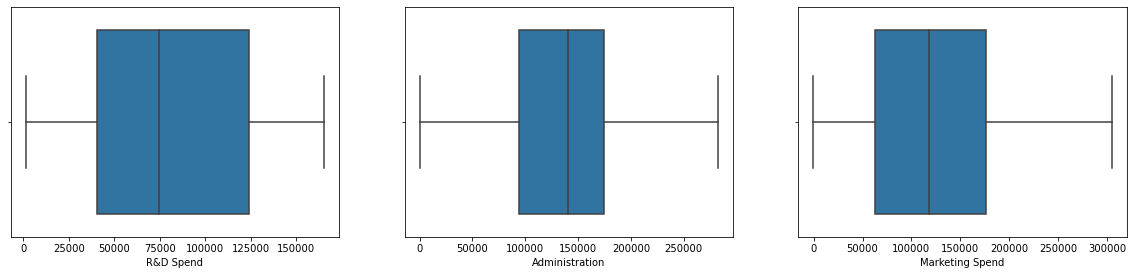

In [20]:
#boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

it seems no outliers found

# 14. Explore the Correlation between numerical features

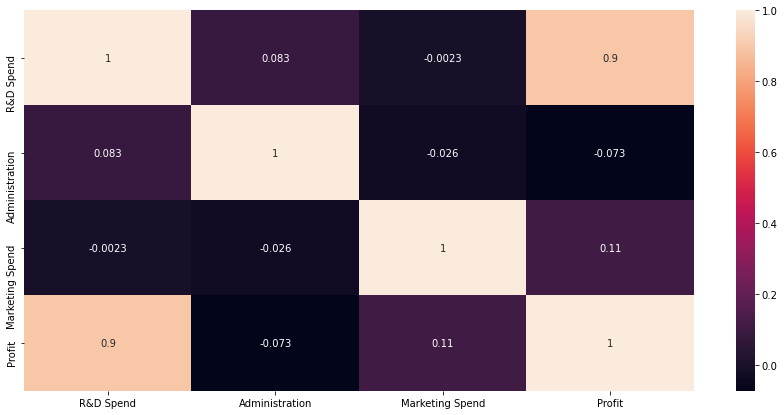

In [21]:
## Checking for correlation
cor_mat=df.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)
plt.show()

# Feature Engineering and Model Building - PredictStartupProfits

In [23]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,78051.14365,55537.75251,12770.82,New York,54575.486170
1,11163.47269,241608.96630,55012.62,New York,-6257.430253
2,153848.90340,169007.95040,46708.68,Florida,86707.726460
3,46913.23785,55770.16760,222415.30,California,36073.618930
4,16844.34943,116066.11220,164528.39,California,24696.317850


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        400 non-null    float64
 1   Administration   400 non-null    float64
 2   Marketing Spend  400 non-null    float64
 3   State            400 non-null    object 
 4   Profit           400 non-null    float64
dtypes: float64(4), object(1)
memory usage: 15.8+ KB


In [25]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,400.000000,400.000000,400.000000,400.000000
mean,80965.478413,142435.708365,119887.684200,54356.336059
std,47668.448443,61451.490115,69125.748567,38805.158844
min,1315.460000,0.000000,-347.000000,-30287.795920
25%,40603.498222,93765.670532,63166.127500,23935.551690
50%,74292.618905,140513.882500,118074.450000,52664.410385
75%,123962.329650,174979.059075,175931.267500,86480.912705
max,165169.886800,282311.018900,304981.620000,149759.960000


# Feature Engineering
Drop unwanted Features
Handle Missing Values
Handle Categorical Features
Handle Feature Scalling
Remove Outliers
As per Exploratory Data Analysis EDA,

these is no unwanted column present in given dataset to remove
no missing value found
only one feature that is State is categorical and it has 3 unique values
it seems no outliers found

In [27]:
# Handle Categorical Features
state_dummies = pd.get_dummies(df['State'],prefix='state',drop_first=True)
df = pd.concat([df,state_dummies],axis=1)

In [28]:
df.drop(['State'], axis=1, inplace=True)

In [29]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,state_Florida,state_New York
0,78051.14365,55537.75251,12770.82,54575.486170,0,1
1,11163.47269,241608.96630,55012.62,-6257.430253,0,1
2,153848.90340,169007.95040,46708.68,86707.726460,1,0
3,46913.23785,55770.16760,222415.30,36073.618930,0,0
4,16844.34943,116066.11220,164528.39,24696.317850,0,0


# Split Dataset into Training set and Test set

In [30]:
X = df.drop(['Profit'],axis=1)
y = df['Profit']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [31]:
X_train.head()

,R&D Spend,Administration,Marketing Spend,state_Florida,state_New York
336,49286.096280,139005.37840,91838.80,0,0
64,103781.970700,187001.27520,77758.20,1,0
55,5518.384663,85709.87893,62714.83,0,0
106,137176.354500,76258.84263,122527.29,0,1
300,165090.308700,78592.38200,60067.19,1,0


In [32]:
len(X_train)

320

In [33]:
len(X_test)

80

# Model Selection

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

In [35]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'normalize': [True, False],
                'copy_X': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [36]:
pd.set_option('display.max_colwidth', 100)
find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.834336,"{'copy_X': True, 'fit_intercept': False, 'normalize': True}"
1,lasso,0.833270,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.691144,"{'criterion': 'mse', 'splitter': 'best'}"


# Model Building

In [37]:
model_lr = LinearRegression(copy_X=True, fit_intercept=True, normalize=True)

In [38]:
model_lr.fit(X_train,y_train)

LinearRegression(normalize=True)

In [39]:
model_lr.score(X_test,y_test)

0.8610579230110005

In [40]:
y_pred= model_lr.predict(X_test)

In [41]:
y_pred

array([-10070.5650658 ,  13525.66603592,  81763.12050325,  40343.01171509,
        87856.7415426 ,   9585.01842232, 100390.60277289,  60404.59127054,
        93958.33124949,  -1262.03864918,  40503.74906037,  18975.75744699,
        79682.27535122,   9967.48162858,  92063.21398933,  96681.21814098,
        -4872.81306025,  80754.14394597,  78588.58633219,  74965.73937692,
       117453.39935363,  71657.08668055,   4257.06663103,  17505.46370563,
        40102.37048373, 109199.22638588,  78048.97024359,  15270.91375494,
        -4164.57520679,  99794.32221561,  43750.54701541,  32870.04238298,
        83928.43666435,  72566.28706791,  20156.17897981,  46470.54304863,
        98479.64160759, 105017.63455656, 105560.45130501,  30626.55326568,
        33600.63035828,  32537.30972024,  46387.75002833,  -9267.53085565,
        49776.62804647,  -1719.44362537,  36261.92171924,  68270.15368251,
        98161.6542021 ,  44287.96821327,   3559.02041412,  97720.53780339,
       103260.50335815,  

In [42]:
y_test

132    -5490.909948
309     4039.310261
341    92277.778380
196    36452.383320
246    69106.834470
           ...     
14     23906.286690
363    19343.292570
304    88638.663160
361    -6326.348760
329     8085.668191
Name: Profit, Length: 80, dtype: float64

In [43]:
X.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'state_Florida',
       'state_New York'],
      dtype='object')

In [44]:
np.where(X.columns=='state_'+str('New York'))[0][0]

4

In [45]:
def predict_profit(r_d_expenses,administration_expenses,marketing_expenses,state):    
    state_index = np.where(X.columns=='state_'+str(state))[0][0]

    x = np.zeros(len(X.columns))
    x[0] = r_d_expenses
    x[1] = administration_expenses
    x[2] = marketing_expenses
    if state_index >= 0:
        x[state_index] = 1

    return model_lr.predict([x])[0]

In [46]:
predict_profit(55493.95,103057.49,214634.81,'New York')

46085.717050666295

# Save Model

In [47]:

import pickle
pickle.dump(model_lr,open('profit_prediction_model.pkl','wb'))